### prequisites

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
import itertools
import pandas as pdd
import seaborn as sns
from markovModel import*
import networkx as nx
from scipy import stats
import pandas as pd

In [156]:
a = np.random.random((2,2))

In [185]:
def sqRotate(sq):
    rots = 0
    while sq[1,1] !=np.max(sq):
        
        sq = sq[:,[1,0]].T
        rots+=1
        
    return sq,rots

def findEpi(sqFL):
    epi = np.argwhere(np.argsort(sqFL.flatten())==0)[0][0]

        
    return epi

In [324]:
fcycles = np.zeros((24,4,4))
fcycles[:,0,:] = [0,0,0,0]

cnt=0
for i in range(4):
     
    #cnt+=1
    
    for j in range(i,4):
        if i!=j:
            fcycles[cnt,[1,3],i] =1
            fcycles[cnt,2:,j] =1 
            cnt+=1
            


In [325]:

cnt=6
for i in range(4):
    

    
    for j in range(4):

        for k in range(j,4):
            if i!=j and j!=k and i != k:

                fcycles[cnt,:,i] =1
                fcycles[cnt,[1,3],j] =1
                fcycles[cnt,2:,k] =1 
                cnt+=1


In [326]:
cnt= 18
for i in range(4):
    for j in range(i,4):
    

    
        for k in range(4):
            #cnt+=1

            for l in range(k,4):
                if  i!=j and j!=k and i != k and k!=l and j!=l and i !=l:

                    fcycles[cnt,:,i] =1
                    fcycles[cnt,:,j] =1
                    fcycles[cnt,[1,3],k] =1
                    fcycles[cnt,2:,l] =1 
                    cnt+=1



In [328]:
fcycleInt = np.zeros((24,4))

In [329]:
for i in range(24):
    for j in range(4):
        fcycleInt[i,j]=convertGenotypeToInt(fcycles[i,j].astype(int))
        

In [330]:
fcycleInt

array([[ 0.,  8.,  4., 12.],
       [ 0.,  8.,  2., 10.],
       [ 0.,  8.,  1.,  9.],
       [ 0.,  4.,  2.,  6.],
       [ 0.,  4.,  1.,  5.],
       [ 0.,  2.,  1.,  3.],
       [ 8., 12., 10., 14.],
       [ 8., 12.,  9., 13.],
       [ 8., 10.,  9., 11.],
       [ 4., 12.,  6., 14.],
       [ 4., 12.,  5., 13.],
       [ 4.,  6.,  5.,  7.],
       [ 2., 10.,  6., 14.],
       [ 2., 10.,  3., 11.],
       [ 2.,  6.,  3.,  7.],
       [ 1.,  9.,  5., 13.],
       [ 1.,  9.,  3., 11.],
       [ 1.,  5.,  3.,  7.],
       [12., 14., 13., 15.],
       [10., 14., 11., 15.],
       [ 9., 13., 11., 15.],
       [ 6., 14.,  7., 15.],
       [ 5., 13.,  7., 15.],
       [ 3., 11.,  7., 15.]])

In [370]:
epis_AMP=[]
rot_AMP=[]
for fcyc in np.array(MIRA_AMP.landscape)[fcycleInt.astype(int)]:
    epis_AMP.append(findEpi(sqRotate(fcyc.reshape(2,2))[0]))
    rot_AMP.append(sqRotate(fcyc.reshape(2,2))[1])

In [371]:
epis_AM=[]
rot_AM=[]
for fcyc in np.array(MIRA_AM.landscape)[fcycleInt.astype(int)]:
    epis_AM.append(findEpi(sqRotate(fcyc.reshape(2,2))[0]))
    rot_AM.append(sqRotate(fcyc.reshape(2,2))[1])

In [372]:
fcycleInt

array([[ 0.,  8.,  4., 12.],
       [ 0.,  8.,  2., 10.],
       [ 0.,  8.,  1.,  9.],
       [ 0.,  4.,  2.,  6.],
       [ 0.,  4.,  1.,  5.],
       [ 0.,  2.,  1.,  3.],
       [ 8., 12., 10., 14.],
       [ 8., 12.,  9., 13.],
       [ 8., 10.,  9., 11.],
       [ 4., 12.,  6., 14.],
       [ 4., 12.,  5., 13.],
       [ 4.,  6.,  5.,  7.],
       [ 2., 10.,  6., 14.],
       [ 2., 10.,  3., 11.],
       [ 2.,  6.,  3.,  7.],
       [ 1.,  9.,  5., 13.],
       [ 1.,  9.,  3., 11.],
       [ 1.,  5.,  3.,  7.],
       [12., 14., 13., 15.],
       [10., 14., 11., 15.],
       [ 9., 13., 11., 15.],
       [ 6., 14.,  7., 15.],
       [ 5., 13.,  7., 15.],
       [ 3., 11.,  7., 15.]])

In [417]:
epis_AMP

[1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 2, 1, 2]

In [374]:
epis_AM

[1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]

In [376]:
rot_AMP

[0, 1, 0, 0, 0, 0, 3, 0, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [377]:
rot_AM

[2, 1, 0, 1, 1, 3, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 3, 2, 1, 0, 3, 0, 3, 0]

In [407]:
np.abs(np.array(rot_AMP)-np.array(rot_AM))

array([2, 0, 0, 1, 1, 3, 2, 0, 0, 3, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 3, 0,
       3, 0])

In [375]:
np.sum(np.abs(np.array(epis_AMP)-np.array(epis_AM)))

[0, 1, 0, 0, 0, 0, 3, 0, 1, 3, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

In [360]:
p1= buildTransitionMatrix(MIRA_AMP)
p2= buildTransitionMatrix(MIRA_AM)

In [364]:
np.sum(np.abs(edgeFlips(p1,p2)))

26.0

In [391]:
sqRotate(np.array(MIRA_AMP.landscape)[fcycleInt.astype(int)][5].reshape(2,2))

(array([[0.051, 1.57 ],
        [0.088, 2.186]]),
 3)

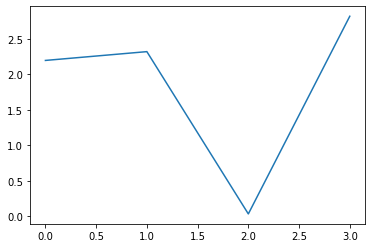

In [413]:
plt.plot(np.array(MIRA_AMP.landscape)[fcycleInt.astype(int)][22])

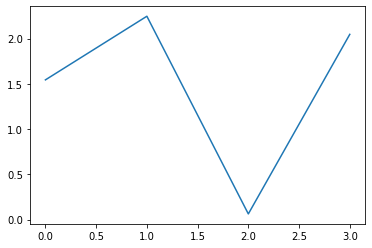

In [414]:
plt.plot(np.array(MIRA_AM.landscape)[fcycleInt.astype(int)][22])

In [404]:
np.array(MIRA_AMP.landscape)[fcycleInt.astype(int)][12]

array([1.948, 0.051, 2.033, 0.088])

In [303]:
#==============================================================================#
# The landscapes reported by Mira et. al.
#==============================================================================#
MIRA_AMP = FitnessLandscape([1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821], "Ampicillin")
MIRA_AM  = FitnessLandscape([1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047], "Amoxicillin")
MIRA_CEC = FitnessLandscape([2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516], "Cefaclor")
MIRA_CTX = FitnessLandscape([0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412], "Cefotaxime")
MIRA_ZOX = FitnessLandscape([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591], "Ceftizoxime")
MIRA_CXM = FitnessLandscape([1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923], "Cefuroxime")
MIRA_CRO = FitnessLandscape([1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227], "Ceftriaxone")
MIRA_AMC = FitnessLandscape([1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728], "Amoxicillin + Clav")
MIRA_CAZ = FitnessLandscape([2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563], "Ceftazidime")
MIRA_CTT = FitnessLandscape([2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543], "Cefotetan")
MIRA_SAM = FitnessLandscape([1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453], "Ampicillin +Sulbactam")
MIRA_CPR = FitnessLandscape([1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288], "Cefprozil")
MIRA_CPD = FitnessLandscape([0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268], "Cefpodoxime")
MIRA_TZP = FitnessLandscape([2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171], "Piperacillin + Tazobactam")
MIRA_FEP = FitnessLandscape([2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203], "Cefepime")



landscapes = [MIRA_AMP, MIRA_AM, MIRA_CEC, MIRA_CTX, MIRA_ZOX, MIRA_CXM, MIRA_CRO, MIRA_AMC, MIRA_CAZ, MIRA_CTT, MIRA_SAM, MIRA_CPR, MIRA_CPD, MIRA_TZP, MIRA_FEP]
names = ['AMP','AM','CEC','CTX','ZOX','CXM','CRO','AMC','CAZ', 'CTT','SAM','CPR','CPD','TZP','FEP']

In [305]:
MIRA_AMP.landscape

[1.851,
 2.082,
 1.948,
 2.434,
 2.024,
 2.198,
 2.033,
 0.034,
 1.57,
 2.165,
 0.051,
 0.083,
 2.186,
 2.322,
 0.088,
 2.821]